### Carga y Exploración Inicial de Datos

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('WinnipegDataset.csv')

# Exploración inicial
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325834 entries, 0 to 325833
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 435.0 MB


,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
count,325834.000000,325834.000000,325834.000000,325834.000000,325834.00000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,...,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000
mean,4.062421,-15.143602,-24.026035,-15.400034,-18.59383,-14.493472,-18.427329,0.256432,-8.882434,-8.626002,...,0.433834,0.329085,2.171177,0.080138,0.919604,0.174447,0.162900,0.403288,0.764646,0.667567
std,1.604617,3.504255,4.054214,3.267857,3.71163,3.189013,3.675741,1.682060,1.204040,2.002658,...,0.245857,0.442008,1.284653,0.182628,0.105953,0.373726,0.222008,0.480141,0.273847,0.471260
min,1.000000,-23.971000,-34.308000,-23.161000,-27.24500,-22.103000,-26.897000,-5.582600,-16.389000,-16.558000,...,0.111110,-1.000000,0.000000,0.000000,0.106190,0.000000,0.000000,-0.000000,0.111110,-1.000000
25%,3.000000,-17.848000,-27.119000,-17.563000,-21.44900,-16.989000,-21.450000,-1.037800,-9.658500,-10.070000,...,0.259260,0.000000,1.000000,0.000000,0.833330,0.000000,0.000000,0.000000,0.506170,0.357140
50%,4.000000,-15.992000,-25.064000,-16.164000,-19.58800,-15.099000,-19.282000,0.309180,-8.915900,-8.733100,...,0.358020,0.357140,2.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,1.000000,1.000000
75%,6.000000,-11.786000,-20.387000,-13.427000,-15.65000,-11.735000,-15.514000,1.558200,-8.190200,-7.158100,...,0.506170,0.661440,3.000000,0.172840,1.000000,0.333330,0.333330,0.848690,1.000000,1.000000
max,7.000000,2.535600,-7.589100,1.104000,0.77491,-0.887390,0.951780,7.029900,-1.175400,-0.924610,...,1.000000,1.000000,12.444000,25.951000,1.000000,66.667000,6.666700,2.197200,1.000000,1.000000


### Análisis de Correlación y Visualización

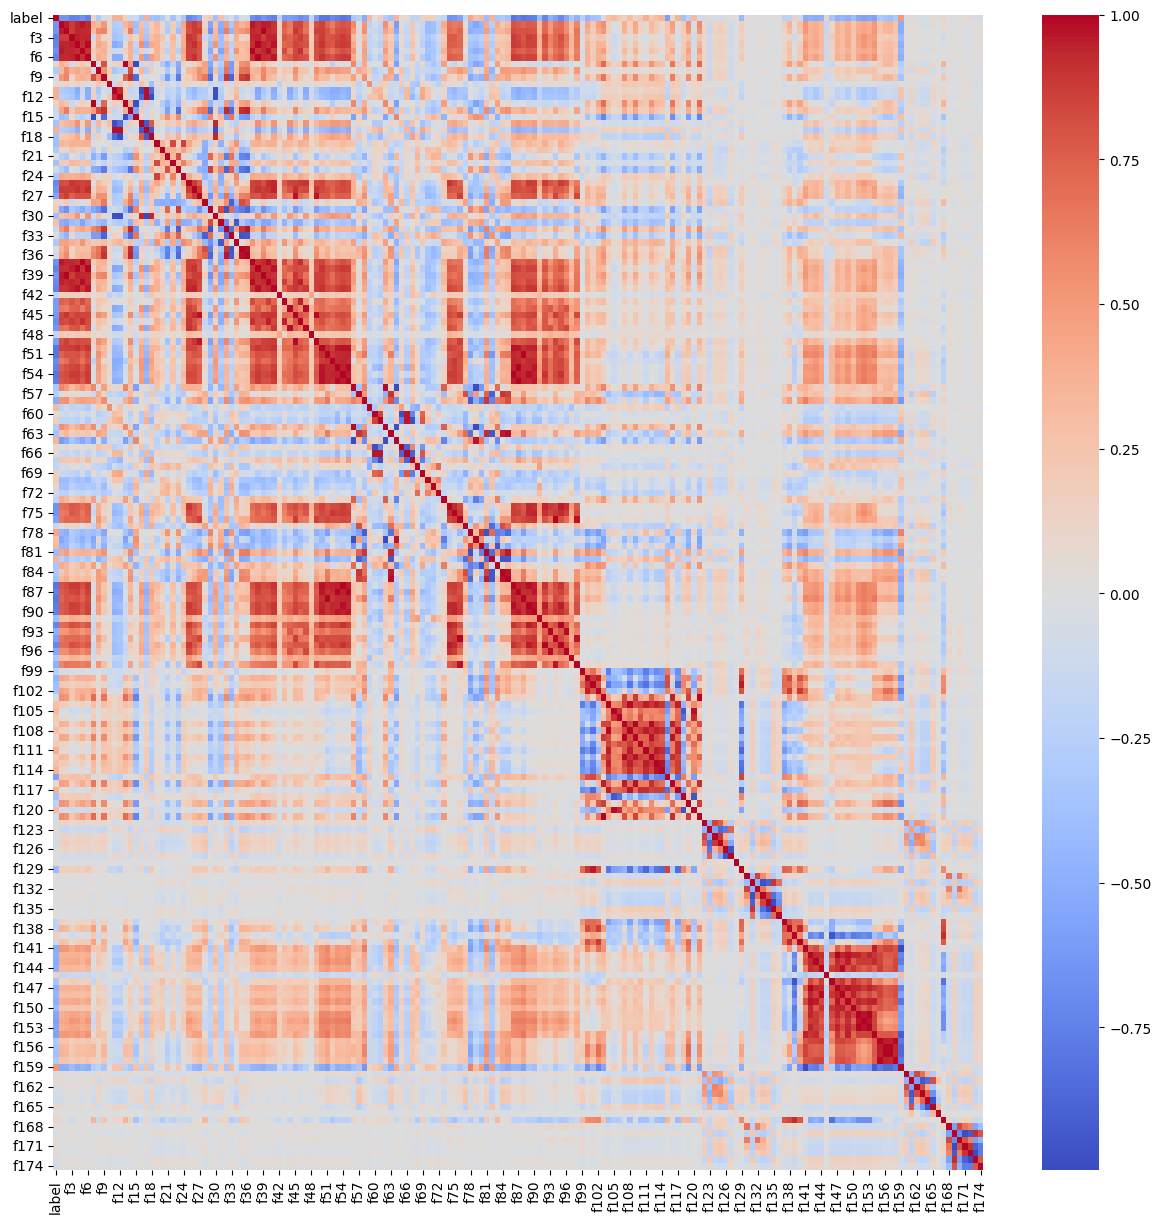

In [44]:
# Matriz de correlación
correlation_matrix = df.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

### Identificación de Variables Altamente Correlacionadas


In [47]:
columnas_altamente_correlacionadas = set()

# Identificar correlaciones altas
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            print(f"Alta correlación entre {correlation_matrix.columns[i]} y {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]}")
            # Añadir la columna con índice mayor a la lista
            columnas_altamente_correlacionadas.add(correlation_matrix.columns[max(i, j)])


Alta correlación entre f2 y f1: 0.9596234377573807
Alta correlación entre f5 y f1: 0.9668713821954747
Alta correlación entre f6 y f4: 0.9870169092666444
Alta correlación entre f13 y f7: 0.9931275769635826
Alta correlación entre f15 y f7: -0.9955244293583008
Alta correlación entre f15 y f13: -0.9793948753602351
Alta correlación entre f16 y f11: -0.9853106785364167
Alta correlación entre f17 y f11: 0.9786547363309978
Alta correlación entre f17 y f12: 0.9810129475929054
Alta correlación entre f18 y f12: -0.9878403521140411
Alta correlación entre f30 y f11: -0.9749968107378421
Alta correlación entre f30 y f12: -0.9747923549166616
Alta correlación entre f30 y f17: -0.9926304532469699
Alta correlación entre f32 y f29: -0.9672737023857697
Alta correlación entre f35 y f33: -0.9510223401865393
Alta correlación entre f36 y f32: 0.9669394116700013
Alta correlación entre f36 y f35: 0.9802336793276684
Alta correlación entre f37 y f1: 0.9668713819593306
Alta correlación entre f37 y f5: 0.99999999999

### Preprocesamiento de Datos: Eliminación y Escalamiento


   label      f1       f3      f4      f7      f8       f9      f10     f11  \
0      1 -13.559 -11.4040 -15.248 -2.1548 -7.8474 -10.0020  0.04239  3.3253   
1      1 -12.802 -10.3990 -14.132 -2.4039 -7.5330  -9.9369  0.22842  3.0360   
2      1 -12.431 -10.0740 -13.598 -2.3566 -7.4717  -9.8283  0.44978  2.7687   
3      1 -12.689 -10.0280 -13.350 -2.6611 -6.8396  -9.5006  0.66378  2.2942   
4      1 -12.686  -9.8185 -13.108 -2.8675 -6.5919  -9.4594  0.83143  2.1756   

      f12  ...     f162     f163    f164     f166    f167      f168     f169  \
0  3.3677  ...  2.44440  1.11110  1.8310  0.72602  5.3333  6.000000  0.29489   
1  3.2644  ...  1.33330  1.11110  1.2149 -0.48751  2.1111  0.098765  0.83333   
2  3.2185  ...  0.77778  0.77778  1.3689  0.25298  2.2222  0.172840  0.68889   
3  2.9580  ...  0.77778  0.77778  1.8892  0.43750  4.1111  0.320990  0.83333   
4  3.0070  ...  1.66670  1.00000  1.7351  0.35000  4.0000  0.444440  0.68889   

      f170     f172     f174  
0  9.77780  1

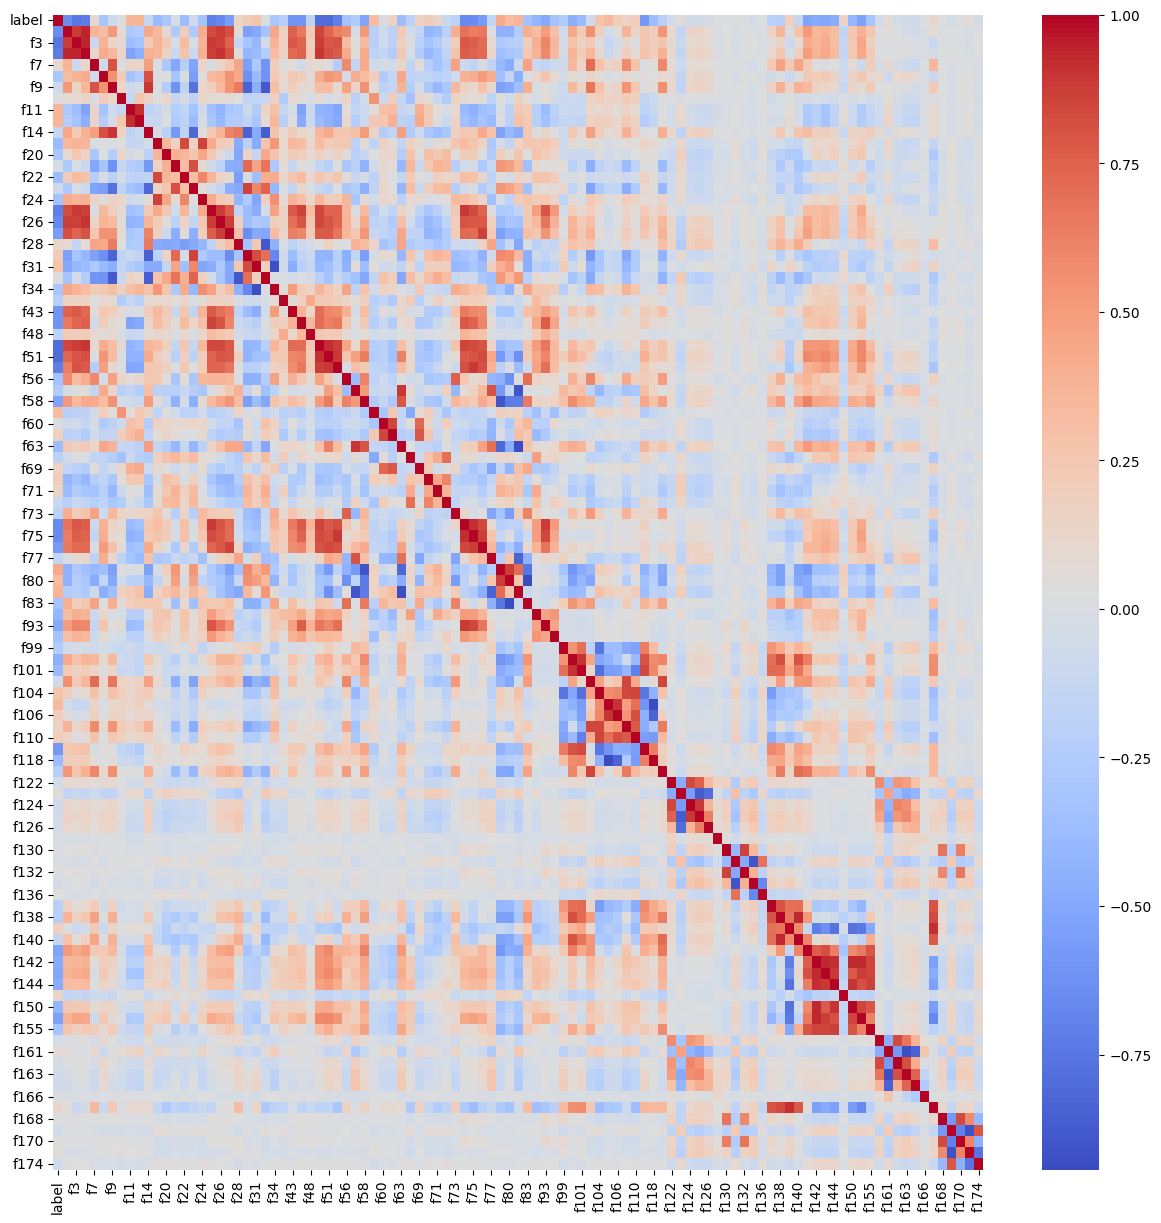

In [51]:
# Convertir el conjunto a lista
columnas_a_eliminar = list(columnas_altamente_correlacionadas)

# Eliminar las columnas altamente correlacionadas
df_preprocesado = df.drop(columns=columnas_a_eliminar)

# Verificar el DataFrame resultante
print(df_preprocesado.head())


# Matriz de correlación
correlation_matrix2 = df_preprocesado.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix2, annot=False, cmap='coolwarm')
plt.show()


In [52]:
from sklearn.preprocessing import StandardScaler

# Separar las etiquetas y las características
X = df_preprocesado.drop('label', axis=1)
y = df_preprocesado['label']

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_escalado = scaler.fit_transform(X)

# Convertir de nuevo a DataFrame
X_escalado = pd.DataFrame(X_escalado, columns=X.columns)


### Dividir los datos en conjuntos de entrenamiento y prueba

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_escalado, y, test_size=0.2, random_state=42)

# Crear el modelo SVM
svm_model = SVC(kernel='poly')

# Entrenar el modelo
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

### Entrenar el modelo


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecir en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[ 7893     0     2    11     3     4     6]
 [    0   708     0     0     0     0     0]
 [    2     1 15092     5     4     6     1]
 [    7     0     5 14819    20     7     0]
 [    1     0     4    11  9363    46     2]
 [    1     0     6    12    46 16848     1]
 [    6     0     0     0     3     1   220]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7919
           2       1.00      1.00      1.00       708
           3       1.00      1.00      1.00     15111
           4       1.00      1.00      1.00     14858
           5       0.99      0.99      0.99      9427
           6       1.00      1.00      1.00     16914
           7       0.96      0.96      0.96       230

    accuracy                           1.00     65167
   macro avg       0.99      0.99      0.99     65167
weighted avg       1.00      1.00      1.00     65167



### Entrenar un SVM con Kernel RBF

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_escalado, y, test_size=0.2, random_state=42)
# Crear y entrenar el modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
# Predecir
y_pred_rbf = svm_rbf.predict(X_test)
# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rbf))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rbf))


Matriz de Confusión:
[[ 7891     1     6    10     3     0     8]
 [    0   707     0     0     0     0     1]
 [    1     0 15096     1     2     5     6]
 [    7     0     8 14818    19     6     0]
 [    1     0     2    16  9362    41     5]
 [    3     0     1     9    35 16864     2]
 [    3     0     0     0     0     1   226]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7919
           2       1.00      1.00      1.00       708
           3       1.00      1.00      1.00     15111
           4       1.00      1.00      1.00     14858
           5       0.99      0.99      0.99      9427
           6       1.00      1.00      1.00     16914
           7       0.91      0.98      0.95       230

    accuracy                           1.00     65167
   macro avg       0.99      0.99      0.99     65167
weighted avg       1.00      1.00      1.00     65167

